# Analysis of countries data

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (10,5)

In [3]:
countries = pd.read_csv('data/countries-of-the-world.csv')

In [4]:
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [5]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         224 non-null object
Infant mortality (per 1000 births)    224 non-null object
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null object
Phones (per 1000)                     223 non-null object
Arable (%)                            225 non-null object
Crops (%)                             225 non-null object
Other (%)                             225 non-null object
Climate                               205 non-null object
Birthrate                 

## Data cleaning

In [6]:
countries.Region.unique()

array(['ASIA (EX. NEAR EAST)         ',
       'EASTERN EUROPE                     ',
       'NORTHERN AFRICA                    ',
       'OCEANIA                            ',
       'WESTERN EUROPE                     ',
       'SUB-SAHARAN AFRICA                 ', 'LATIN AMER. & CARIB    ',
       'C.W. OF IND. STATES ', 'NEAR EAST                          ',
       'NORTHERN AMERICA                   ',
       'BALTICS                            '], dtype=object)

We can see that values have whitespaces at the end. Let us remove these and sanitize also `Country` column, just to make sure.

In [7]:
countries.Region = countries.Region.str.strip()
countries.Country = countries.Country.str.strip()

In [8]:
countries.Region.unique()

array(['ASIA (EX. NEAR EAST)', 'EASTERN EUROPE', 'NORTHERN AFRICA',
       'OCEANIA', 'WESTERN EUROPE', 'SUB-SAHARAN AFRICA',
       'LATIN AMER. & CARIB', 'C.W. OF IND. STATES', 'NEAR EAST',
       'NORTHERN AMERICA', 'BALTICS'], dtype=object)

Next, we want to deal with decimal separator. Since it is a comma in this case, it causes numbers to be represented as strings.

In [9]:
sanitized = countries[countries.columns[~countries.columns.isin(['Country', 'Region'])]].select_dtypes(exclude=['int64', 'float64']).apply(
    lambda x: x.str.replace(',', '.', regex=False).astype('float'))

In [10]:
countries[countries.columns[~countries.columns.isin(['Country', 'Region', 'Population', 'Area (sq. mi.)', 'GDP ($ per capita)'])]] = sanitized

To select a complement to a given set of columns, we could also use `difference` function.

In [11]:
countries[countries.columns.difference(['Country', 'Region', 'Population', 'Area (sq. mi.)', 'GDP ($ per capita)'])].head()

,Agriculture,Arable (%),Birthrate,Climate,Coastline (coast/area ratio),Crops (%),Deathrate,Industry,Infant mortality (per 1000 births),Literacy (%),Net migration,Other (%),Phones (per 1000),Pop. Density (per sq. mi.),Service
0,0.380,12.13,46.60,1.0,0.00,0.22,20.34,0.240,163.07,36.0,23.06,87.65,3.2,48.0,0.380
1,0.232,21.09,15.11,3.0,1.26,4.42,5.22,0.188,21.52,86.5,-4.93,74.49,71.2,124.6,0.579
2,0.101,3.22,17.14,1.0,0.04,0.25,4.61,0.600,31.00,70.0,-0.39,96.53,78.1,13.8,0.298
3,NaN,10.00,22.46,2.0,58.29,15.00,3.27,NaN,9.27,97.0,-20.71,75.00,259.5,290.4,NaN
4,NaN,2.22,8.71,3.0,0.00,0.00,6.25,NaN,4.05,100.0,6.60,97.78,497.2,152.1,NaN


In [12]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null float64
Coastline (coast/area ratio)          227 non-null float64
Net migration                         224 non-null float64
Infant mortality (per 1000 births)    224 non-null float64
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null float64
Phones (per 1000)                     223 non-null float64
Arable (%)                            225 non-null float64
Crops (%)                             225 non-null float64
Other (%)                             225 non-null float64
Climate                               205 non-null float64
Birthrate       

However, it would be much easier, if we handled this at the data load time. Function `read_csv` has a paramter for this.

In [13]:
pd.read_csv('data/countries-of-the-world.csv', decimal=',').head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


## Missing data

From the output of the `info` function, we can see that there are missing data in some of the columns. However, we can check it using other functions as well, which also allow us to identify specific rows containing missing values.

The number of rows with at least one mssing value.

In [14]:
countries.shape[0] - countries.dropna().shape[0]

48

In [15]:
countries.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

Total number of missing values

In [16]:
countries.isnull().sum().sum()

110

In [17]:
countries[countries.isnull().any(axis=1)]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,NaN,215.4,13.60,2.96,83.44,4.0,8.77,8.27,0.142,0.308,0.550
36,Canada,NORTHERN AMERICA,33098932,9984670,3.3,2.02,5.96,4.75,29800.0,97.0,552.2,4.96,0.02,95.02,NaN,10.78,7.80,0.022,0.294,0.684
47,Cook Islands,OCEANIA,21388,240,89.1,50.00,NaN,NaN,5000.0,95.0,289.9,17.39,13.04,69.57,2.0,21.00,NaN,0.151,0.096,0.753
50,Croatia,EASTERN EUROPE,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.5,420.4,26.09,2.27,71.65,NaN,9.61,11.48,0.070,0.308,0.622
52,Cyprus,NEAR EAST,784301,9250,84.8,7.01,0.43,7.18,19200.0,97.6,NaN,7.79,4.44,87.77,3.0,12.56,7.68,0.037,0.198,0.765
58,East Timor,ASIA (EX. NEAR EAST),1062777,15007,70.8,4.70,0.00,47.41,500.0,58.6,NaN,4.71,0.67,94.62,2.0,26.99,6.24,0.085,0.231,0.684
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,2.14,0.00,97.86,NaN,14.05,8.70,0.270,0.110,0.620


Be careful when using `dropna`. In its default setting, it removes all rows containing even one missing value. In most cases, that is not what we want. In week 6, we will look at better strategies of dealing with missing values in data.

## Exploratory data analysis

### GDP per capita

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

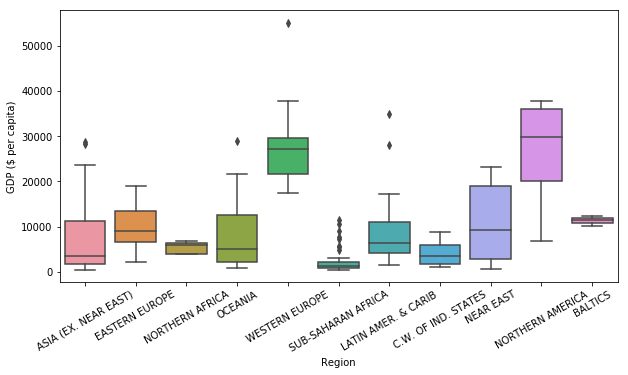

In [18]:
sns.boxplot('Region', 'GDP ($ per capita)', data=countries)
pylab.xticks(rotation=30)

In [19]:
countries.Region.value_counts()

SUB-SAHARAN AFRICA      51
LATIN AMER. & CARIB     45
ASIA (EX. NEAR EAST)    28
WESTERN EUROPE          28
OCEANIA                 21
NEAR EAST               16
C.W. OF IND. STATES     12
EASTERN EUROPE          12
NORTHERN AFRICA          6
NORTHERN AMERICA         5
BALTICS                  3
Name: Region, dtype: int64

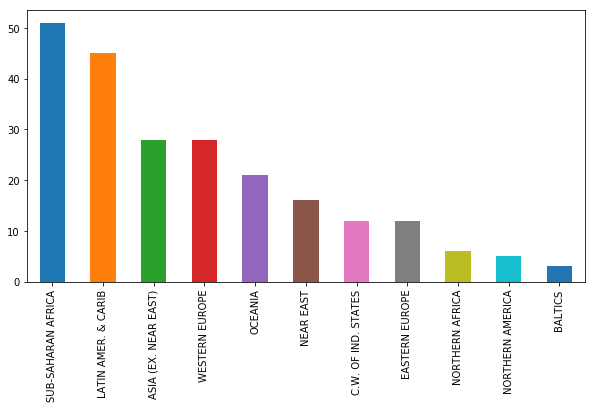

In [20]:
countries.Region.value_counts().plot(kind='bar')

#### Rank of Slovakia

In [21]:
countries['GDP_rank'] = countries['GDP ($ per capita)'].rank(ascending=False, method='first')

In [22]:
countries[countries.Country == 'Slovakia']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,GDP_rank
185,Slovakia,EASTERN EUROPE,5439448,48845,111.4,0.0,0.3,7.41,13300.0,NaN,...,30.16,2.62,67.22,3.0,10.65,9.45,0.035,0.294,0.672,62.0


In [23]:
eu_gdp = countries.loc[(countries.Region == 'EASTERN EUROPE') | (countries.Region == 'WESTERN EUROPE') | (countries.Region == 'BALTICS'), ['GDP ($ per capita)']].mean().values[0]
eu_gdp

21137.20930232558

In [24]:
sk_gdp = countries.loc[countries.Country == 'Slovakia', 'GDP ($ per capita)'].values[0]
sk_gdp

13300.0

In [25]:
sk_gdp/eu_gdp

0.6292221366486963

### Literacy ratio in the countries of Europe

In [26]:
eu_countries = countries[(countries.Region == 'EASTERN EUROPE') | (countries.Region == 'WESTERN EUROPE')]

Here, we omitted the Baltic countries, which are for some reason kept in a separate region. We could have taken them as a separate category for the comparisson or merge it with Eastern Europe, since they were part of Soviet block of countries.

In [27]:
eu_countries['Literacy (%)'].describe()

count     32.000000
mean      98.025000
std        2.885224
min       86.500000
25%       98.000000
50%       99.000000
75%       99.825000
max      100.000000
Name: Literacy (%), dtype: float64

In [28]:
max_lit = eu_countries['Literacy (%)'].max()
min_lit = eu_countries['Literacy (%)'].min()

In [29]:
eu_countries[eu_countries['Literacy (%)'] == min_lit]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,GDP_rank
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,130.0


In [30]:
eu_countries[eu_countries['Literacy (%)'] == max_lit]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,GDP_rank
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN,43.0
54,Denmark,WESTERN EUROPE,5450661,43094,126.5,16.97,2.48,4.56,31100.0,100.0,...,54.02,0.19,45.79,3.0,11.13,10.36,0.018,0.246,0.735,8.0
68,Finland,WESTERN EUROPE,5231372,338145,15.5,0.37,0.95,3.57,27400.0,100.0,...,7.19,0.03,92.78,3.0,10.45,9.86,0.028,0.295,0.676,22.0
119,Liechtenstein,WESTERN EUROPE,33987,160,212.4,0.00,4.85,4.70,25000.0,100.0,...,25.00,0.00,75.00,4.0,10.21,7.18,0.060,0.390,0.550,26.0
121,Luxembourg,WESTERN EUROPE,474413,2586,183.5,0.00,8.97,4.81,55100.0,100.0,...,23.28,0.40,76.32,NaN,11.94,8.41,0.010,0.130,0.860,1.0
154,Norway,WESTERN EUROPE,4610820,323802,14.2,7.77,1.74,3.70,37800.0,100.0,...,2.87,0.00,97.13,3.0,11.46,9.40,0.021,0.415,0.564,2.0


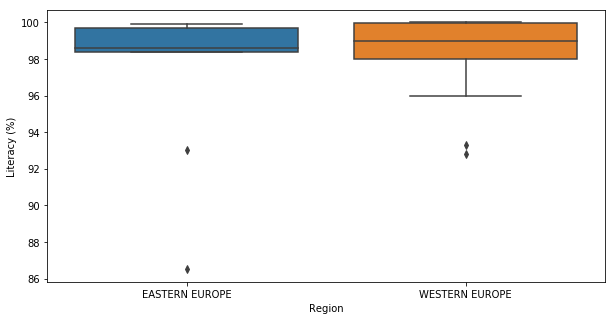

In [31]:
sns.boxplot('Region','Literacy (%)', data=eu_countries)

In [32]:
eu_countries[['Region', 'Literacy (%)']].groupby('Region').agg(['mean', 'std', 'median', 'min', 'max'])

Literacy (%)                              
                       mean       std median   min    max
Region                                                   
EASTERN EUROPE    97.088889  4.503455   98.6  86.5   99.9
WESTERN EUROPE    98.391304  1.963742   99.0  92.8  100.0

Even though the means are not the same, based on the distributions, it seems there is **no significant** difference in the two sets of countries. We will study, how to evaluate this using a statistical test, in week 5.

### Population density in the countries of Europe

Using `seaborn` library

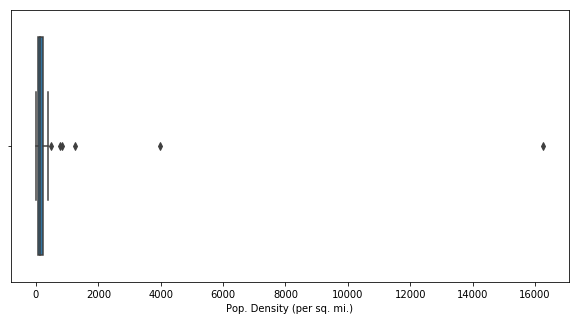

In [33]:
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot('Pop. Density (per sq. mi.)', data=eu_countries)

Or using `pandas` (`matplotlib`)

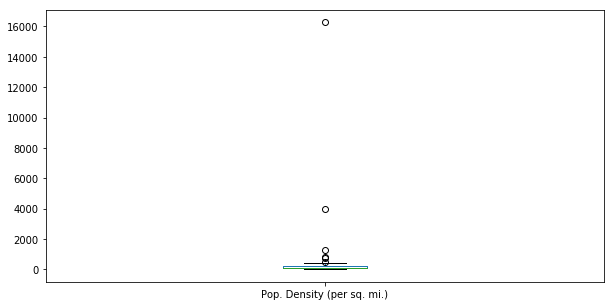

In [34]:
eu_countries['Pop. Density (per sq. mi.)'].plot(kind='box')

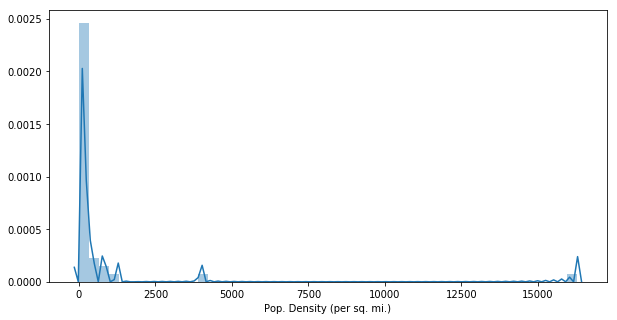

In [35]:
sns.distplot(eu_countries['Pop. Density (per sq. mi.)'])

There are some countries with very high population density. Which ones are they?

In [36]:
treshold = eu_countries['Pop. Density (per sq. mi.)'].quantile(.95)
eu_countries[eu_countries['Pop. Density (per sq. mi.)'] > treshold]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,GDP_rank
78,Gibraltar,WESTERN EUROPE,27928,7,3989.7,171.43,0.00,5.13,17500.0,NaN,...,0.0,0.0,100.0,NaN,10.74,9.31,NaN,NaN,NaN,51.0
138,Monaco,WESTERN EUROPE,32543,2,16271.5,205.00,7.75,5.43,27000.0,99.0,...,0.0,0.0,100.0,NaN,9.19,12.91,0.17,NaN,NaN,23.0


These two outliers cause the whole European average to be skewed to right.

In [37]:
eu_countries['Pop. Density (per sq. mi.)'].mean()

696.7

In [38]:
eu_countries['Pop. Density (per sq. mi.)'].median()

119.05

If we are able to identify such outliers, there are multiple strategies, how to deal with them. Stay tuned for lecture in week 6.

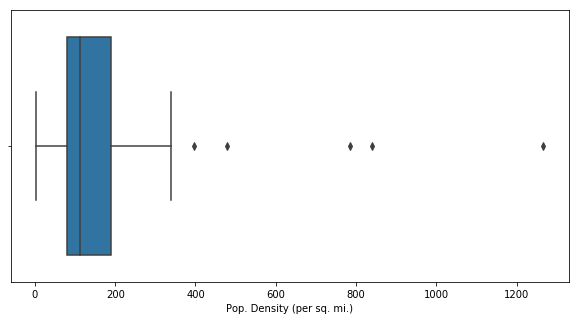

In [39]:
sns.boxplot('Pop. Density (per sq. mi.)', data=eu_countries[eu_countries['Pop. Density (per sq. mi.)'] < treshold])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

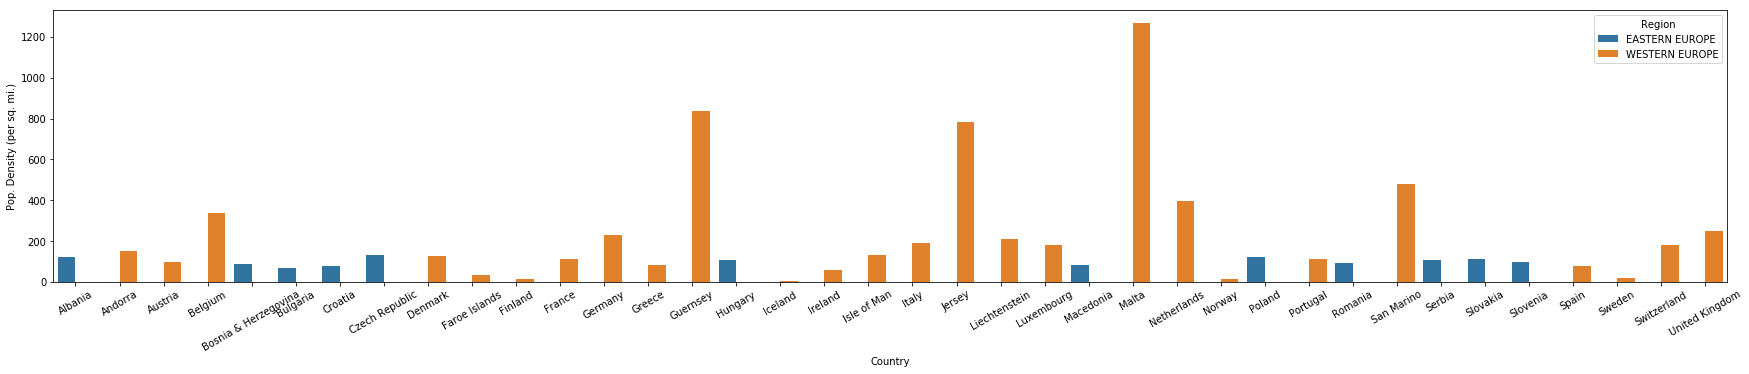

In [40]:
plt.rcParams["figure.figsize"] = (30,5)
sns.barplot(x='Country', y='Pop. Density (per sq. mi.)', data=eu_countries[eu_countries['Pop. Density (per sq. mi.)'] < treshold], hue='Region')
pylab.xticks(rotation=30)

## Correlations

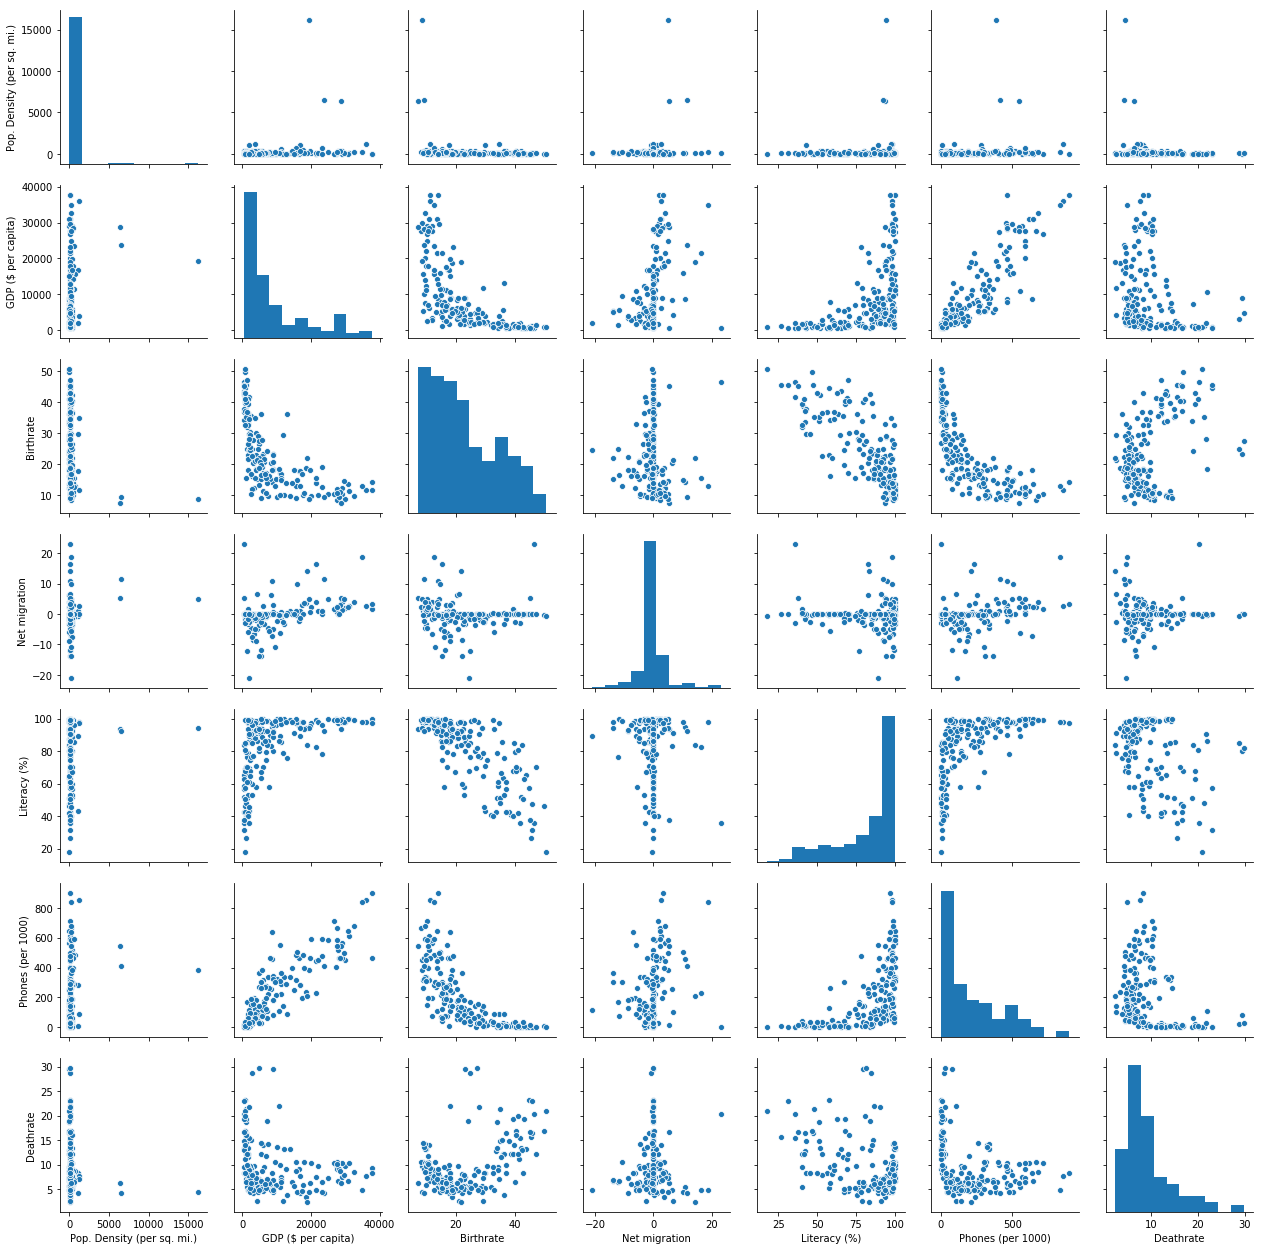

In [41]:
sns.pairplot(countries.dropna()[['Pop. Density (per sq. mi.)', 'GDP ($ per capita)', 
                        'Birthrate', 'Net migration', 'Literacy (%)', 'Phones (per 1000)', 'Deathrate']])

In [42]:
countries['GDP ($ per capita)'].corr(countries['Birthrate'])

-0.6501370279422612

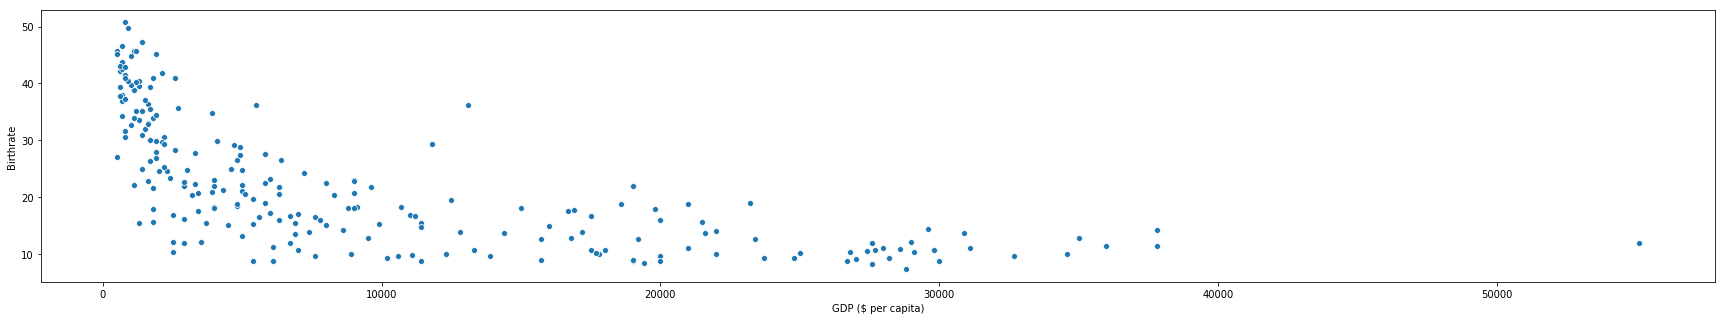

In [43]:
sns.scatterplot('GDP ($ per capita)', 'Birthrate', data=countries)

In [44]:
countries['Phones (per 1000)'].corr(countries['Birthrate'])

-0.7246144139500447

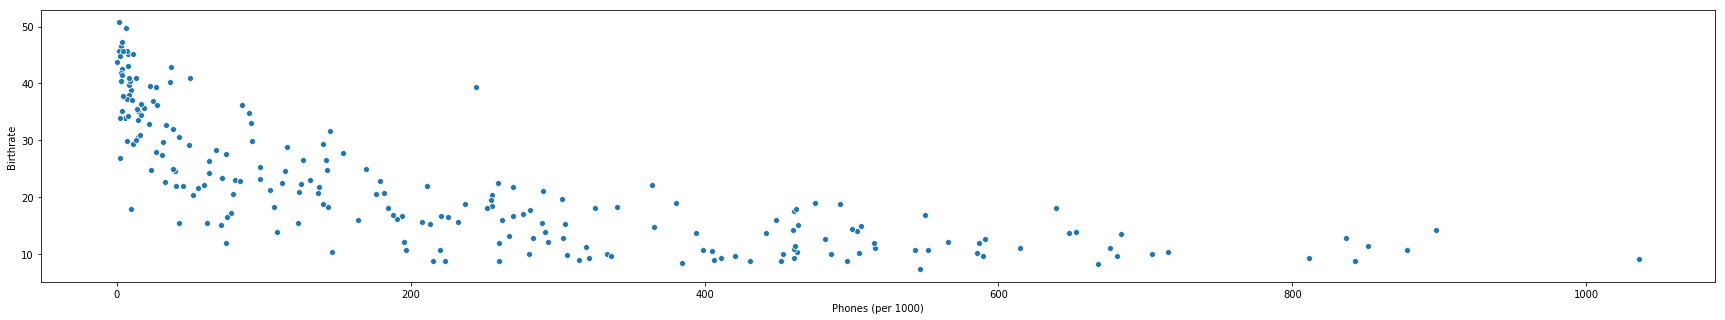

In [45]:
sns.scatterplot('Phones (per 1000)', 'Birthrate', data=countries)

There is a strong negative correlation between number of phones per 1000 people and birthrate. Can we claim that the more phones people have, the less children they are inclined to have? Be careful and do not mistake correlation for causation.

Examples of other interesting correlations can be found here: http://www.tylervigen.com/spurious-correlations